In [3]:
import pandas as pd
import numpy as np

In [4]:
Mall_data = pd.read_csv("owid-covid-data.csv")

In [5]:
all_data=Mall_data

In [6]:
all_data.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176687 entries, 0 to 176686
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    176687 non-null  object 
 1   continent                                   166328 non-null  object 
 2   location                                    176687 non-null  object 
 3   date                                        176687 non-null  object 
 4   total_cases                                 170361 non-null  float64
 5   new_cases                                   170192 non-null  float64
 6   new_cases_smoothed                          168195 non-null  float64
 7   total_deaths                                152270 non-null  float64
 8   new_deaths                                  152282 non-null  float64
 9   new_deaths_smoothed                         150114 non-null  float64
 

In [8]:
data=all_data.drop(['continent', 'new_cases_smoothed','new_deaths_smoothed',
               'new_cases_smoothed_per_million','total_cases_per_million','new_cases_per_million',
               'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million',
              'new_deaths_smoothed_per_million','reproduction_rate','icu_patients_per_million',
               'hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
              'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests',
              'total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed',
               'new_tests_smoothed_per_thousand',
              'positive_rate','tests_per_case','tests_units','new_vaccinations','new_vaccinations_smoothed',
              'total_vaccinations_per_hundred','new_vaccinations_smoothed_per_million',
               'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
              'aged_65_older','stringency_index','aged_70_older','gdp_per_capita','extreme_poverty',
              'cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
              'handwashing_facilities','hospital_beds_per_thousand','life_expectancy',
               'human_development_index','excess_mortality_cumulative_absolute','excess_mortality',
              'excess_mortality_cumulative','excess_mortality_cumulative_per_million'], 
              axis=1)


    
    
    

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176687 entries, 0 to 176686
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   iso_code                             176687 non-null  object 
 1   location                             176687 non-null  object 
 2   date                                 176687 non-null  object 
 3   total_cases                          170361 non-null  float64
 4   new_cases                            170192 non-null  float64
 5   total_deaths                         152270 non-null  float64
 6   new_deaths                           152282 non-null  float64
 7   icu_patients                         23619 non-null   float64
 8   hosp_patients                        25018 non-null   float64
 9   total_vaccinations                   47884 non-null   float64
 10  people_vaccinated                    45524 non-null   float64
 11  people_fully_

In [10]:
print(data.isna().sum())
print(30 * '-')
print('Total missing values are:', data.isna().sum().sum())
print(30 * '-')

iso_code                                    0
location                                    0
date                                        0
total_cases                              6326
new_cases                                6495
total_deaths                            24417
new_deaths                              24405
icu_patients                           153068
hosp_patients                          151669
total_vaccinations                     128803
people_vaccinated                      131163
people_fully_vaccinated                133802
total_boosters                         156301
people_vaccinated_per_hundred          131163
people_fully_vaccinated_per_hundred    133802
total_boosters_per_hundred             156301
population                               1106
population_density                      19302
median_age                              30714
dtype: int64
------------------------------
Total missing values are: 1388837
------------------------------


In [117]:
# Data set for USA

In [11]:
usa_data = data[data['location'] == 'United States']
usa_data

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        NaN   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
...         ...            ...         ...          ...        ...   
167242      USA  United States  2022-04-01   80140309.0    38055.0   
167243      USA  United States  2022-04-02   80150811.0    10502.0   
167244      USA  United States  2022-04-03   80155397.0     4586.0   
167245      USA  United States  2022-04-04   80179289.0    23892.0   
167246      USA  United States  2022-04-05   80208810.0    29521.0   

        total_deaths  new_deaths  icu_patients  hosp_patients  \
166442           NaN         NaN           NaN            NaN   
166443           NaN         NaN           NaN            NaN   
166444           NaN         NaN           NaN            NaN   
166445           NaN         NaN           NaN            NaN   
166446           NaN         NaN           NaN            NaN   
...              ...         ...           ...            ...   
167242      981450.0       812.0        1852.0        10872.0   
167243      981612.0       162.0        1798.0        10549.0   
167244      981644.0        32.0        1790.0        10336.0   
167245      982099.0       455.0           NaN            NaN   
167246      982576.0       477.0           NaN            NaN   

        total_vaccinations  people_vaccinated  people_fully_vaccinated  \
166442                 NaN                NaN                      NaN   
166443                 NaN                NaN                      NaN   
166444                 NaN                NaN                      NaN   
166445                 NaN                NaN                      NaN   
166446                 NaN                NaN                      NaN   
...                    ...                ...                      ...   
167242         562271679.0        255741552.0              217857148.0   
167243         562420626.0        255763206.0              217879342.0   
167244         562435301.0        255765972.0              217882466.0   
167245                 NaN                NaN                      NaN   
167246                 NaN                NaN                      NaN   

        total_boosters  people_vaccinated_per_hundred  \
166442             NaN                            NaN   
166443             NaN                            NaN   
166444             NaN                            NaN   
166445             NaN                            NaN   
166446             NaN                            NaN   
...                ...                            ...   
167242      98023086.0                          77.03   
167243      98061690.0                          77.04   
167244      98065668.0                          77.04   
167245             NaN                            NaN   
167246             NaN                            NaN   

        people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
166442                                  NaN                         NaN   
166443                                  NaN                         NaN   
166444                                  NaN                         NaN   
166445                                  NaN                         NaN   
166446                                  NaN                         NaN   
...                                     ...                         ...   
167242                                65.62                       29.52   
167243                                65.62                       29.54   
167244                                65.63                       29.54   
167245                                  NaN                  

In [12]:
print(usa_data.isna().sum())
print(30 * '-')
print('Total missing values are:', usa_data.isna().sum().sum())
print(30 * '-')

iso_code                                 0
location                                 0
date                                     0
total_cases                              0
new_cases                                1
total_deaths                            38
new_deaths                              39
icu_patients                           177
hosp_patients                          177
total_vaccinations                     328
people_vaccinated                      328
people_fully_vaccinated                328
total_boosters                         571
people_vaccinated_per_hundred          328
people_fully_vaccinated_per_hundred    328
total_boosters_per_hundred             571
population                               0
population_density                       0
median_age                               0
dtype: int64
------------------------------
Total missing values are: 3214
------------------------------


In [13]:
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
#usa_data.set_option('display.max_rows', None)
#usa_data.set_option('display.max_colwidth', None)

In [14]:
usa_data

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        NaN   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
166447      USA  United States  2020-01-27          5.0        0.0   
166448      USA  United States  2020-01-28          5.0        0.0   
166449      USA  United States  2020-01-29          6.0        1.0   
166450      USA  United States  2020-01-30          6.0        0.0   
166451      USA  United States  2020-01-31          8.0        2.0   
166452      USA  United States  2020-02-01          8.0        0.0   
166453      USA  United States  2020-02-02          8.0        0.0   
166454      USA  United States  2020-02-03         11.0        3.0   
166455      USA  United States  2020-02-04         11.0        0.0   
166456      USA  United States  2020-02-05         11.0        0.0   
166457      USA  United States  2020-02-06         12.0        1.0   
166458      USA  United States  2020-02-07         12.0        0.0   
166459      USA  United States  2020-02-08         12.0        0.0   
166460      USA  United States  2020-02-09         12.0        0.0   
166461      USA  United States  2020-02-10         12.0        0.0   
166462      USA  United States  2020-02-11         13.0        1.0   
166463      USA  United States  2020-02-12         13.0        0.0   
166464      USA  United States  2020-02-13         14.0        1.0   
166465      USA  United States  2020-02-14         14.0        0.0   
166466      USA  United States  2020-02-15         14.0        0.0   
166467      USA  United States  2020-02-16         14.0        0.0   
166468      USA  United States  2020-02-17         14.0        0.0   
166469      USA  United States  2020-02-18         14.0        0.0   
166470      USA  United States  2020-02-19         14.0        0.0   
166471      USA  United States  2020-02-20         14.0        0.0   
166472      USA  United States  2020-02-21         16.0        2.0   
166473      USA  United States  2020-02-22         16.0        0.0   
166474      USA  United States  2020-02-23         16.0        0.0   
166475      USA  United States  2020-02-24         16.0        0.0   
166476      USA  United States  2020-02-25         16.0        0.0   
166477      USA  United States  2020-02-26         16.0        0.0   
166478      USA  United States  2020-02-27         17.0        1.0   
166479      USA  United States  2020-02-28         17.0        0.0   
166480      USA  United States  2020-02-29         25.0        8.0   
166481      USA  United States  2020-03-01         32.0        7.0   
166482      USA  United States  2020-03-02         55.0       23.0   
166483      USA  United States  2020-03-03         74.0       19.0   
166484      USA  United States  2020-03-04        107.0       33.0   
166485      USA  United States  2020-03-05        184.0       77.0   
166486      USA  United States  2020-03-06        237.0       53.0   
166487      USA  United States  2020-03-07        403.0      166.0   
166488      USA  United States  2020-03-08        519.0      116.0   
166489      USA  United States  2020-03-09        594.0       75.0   
166490      USA  United States  2020-03-10        782.0      188.0   
166491      USA  United States  2020-03-11       1147.0      365.0   
166492      USA  United States  2020-03-12       1586.0      439.0   
166493      USA  United States  2020-03-13       2219.0      633.0   
166494      USA  United States  2020-03-14       2978.0      759.0   
166495      USA  United States  2020-03-15       3212.0      234.0   
166496      USA  United States  2020-03-16       4679.0     1467.0   
166497      USA  United States  2020-03-17       6512.0     1833.0   
166498      USA  

In [15]:
#print(usa_data.iloc[[0],[15]])
usa_data.iloc[[0],[4]] = 0
usa_data.iloc[[0],[5]] = 0
usa_data.iloc[[0],[6]] = 0
usa_data.iloc[[0],[7]] = 0
usa_data.iloc[[0],[8]] = 0
usa_data.iloc[[0],[9]] = 0
usa_data.iloc[[0],[10]] = 0
usa_data.iloc[[0],[11]] = 0
usa_data.iloc[[0],[12]] = 0
usa_data.iloc[[0],[13]] = 0
usa_data.iloc[[0],[14]] = 0
usa_data.iloc[[0],[15]] = 0

/Users/masudrabbani/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
print(usa_data.isna().sum())
print(30 * '-')
print('Total missing values are:', usa_data.isna().sum().sum())
print(30 * '-')

iso_code                                 0
location                                 0
date                                     0
total_cases                              0
new_cases                                0
total_deaths                            37
new_deaths                              38
icu_patients                           176
hosp_patients                          176
total_vaccinations                     327
people_vaccinated                      327
people_fully_vaccinated                327
total_boosters                         570
people_vaccinated_per_hundred          327
people_fully_vaccinated_per_hundred    327
total_boosters_per_hundred             570
population                               0
population_density                       0
median_age                               0
dtype: int64
------------------------------
Total missing values are: 3202
------------------------------


In [17]:
usa_data

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        0.0   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
166447      USA  United States  2020-01-27          5.0        0.0   
166448      USA  United States  2020-01-28          5.0        0.0   
166449      USA  United States  2020-01-29          6.0        1.0   
166450      USA  United States  2020-01-30          6.0        0.0   
166451      USA  United States  2020-01-31          8.0        2.0   
166452      USA  United States  2020-02-01          8.0        0.0   
166453      USA  United States  2020-02-02          8.0        0.0   
166454      USA  United States  2020-02-03         11.0        3.0   
166455      USA  United States  2020-02-04         11.0        0.0   
166456      USA  United States  2020-02-05         11.0        0.0   
166457      USA  United States  2020-02-06         12.0        1.0   
166458      USA  United States  2020-02-07         12.0        0.0   
166459      USA  United States  2020-02-08         12.0        0.0   
166460      USA  United States  2020-02-09         12.0        0.0   
166461      USA  United States  2020-02-10         12.0        0.0   
166462      USA  United States  2020-02-11         13.0        1.0   
166463      USA  United States  2020-02-12         13.0        0.0   
166464      USA  United States  2020-02-13         14.0        1.0   
166465      USA  United States  2020-02-14         14.0        0.0   
166466      USA  United States  2020-02-15         14.0        0.0   
166467      USA  United States  2020-02-16         14.0        0.0   
166468      USA  United States  2020-02-17         14.0        0.0   
166469      USA  United States  2020-02-18         14.0        0.0   
166470      USA  United States  2020-02-19         14.0        0.0   
166471      USA  United States  2020-02-20         14.0        0.0   
166472      USA  United States  2020-02-21         16.0        2.0   
166473      USA  United States  2020-02-22         16.0        0.0   
166474      USA  United States  2020-02-23         16.0        0.0   
166475      USA  United States  2020-02-24         16.0        0.0   
166476      USA  United States  2020-02-25         16.0        0.0   
166477      USA  United States  2020-02-26         16.0        0.0   
166478      USA  United States  2020-02-27         17.0        1.0   
166479      USA  United States  2020-02-28         17.0        0.0   
166480      USA  United States  2020-02-29         25.0        8.0   
166481      USA  United States  2020-03-01         32.0        7.0   
166482      USA  United States  2020-03-02         55.0       23.0   
166483      USA  United States  2020-03-03         74.0       19.0   
166484      USA  United States  2020-03-04        107.0       33.0   
166485      USA  United States  2020-03-05        184.0       77.0   
166486      USA  United States  2020-03-06        237.0       53.0   
166487      USA  United States  2020-03-07        403.0      166.0   
166488      USA  United States  2020-03-08        519.0      116.0   
166489      USA  United States  2020-03-09        594.0       75.0   
166490      USA  United States  2020-03-10        782.0      188.0   
166491      USA  United States  2020-03-11       1147.0      365.0   
166492      USA  United States  2020-03-12       1586.0      439.0   
166493      USA  United States  2020-03-13       2219.0      633.0   
166494      USA  United States  2020-03-14       2978.0      759.0   
166495      USA  United States  2020-03-15       3212.0      234.0   
166496      USA  United States  2020-03-16       4679.0     1467.0   
166497      USA  United States  2020-03-17       6512.0     1833.0   
166498      USA  

In [18]:
usa_data=usa_data.ffill(axis ='rows')

In [19]:
usa_data

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        0.0   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
166447      USA  United States  2020-01-27          5.0        0.0   
166448      USA  United States  2020-01-28          5.0        0.0   
166449      USA  United States  2020-01-29          6.0        1.0   
166450      USA  United States  2020-01-30          6.0        0.0   
166451      USA  United States  2020-01-31          8.0        2.0   
166452      USA  United States  2020-02-01          8.0        0.0   
166453      USA  United States  2020-02-02          8.0        0.0   
166454      USA  United States  2020-02-03         11.0        3.0   
166455      USA  United States  2020-02-04         11.0        0.0   
166456      USA  United States  2020-02-05         11.0        0.0   
166457      USA  United States  2020-02-06         12.0        1.0   
166458      USA  United States  2020-02-07         12.0        0.0   
166459      USA  United States  2020-02-08         12.0        0.0   
166460      USA  United States  2020-02-09         12.0        0.0   
166461      USA  United States  2020-02-10         12.0        0.0   
166462      USA  United States  2020-02-11         13.0        1.0   
166463      USA  United States  2020-02-12         13.0        0.0   
166464      USA  United States  2020-02-13         14.0        1.0   
166465      USA  United States  2020-02-14         14.0        0.0   
166466      USA  United States  2020-02-15         14.0        0.0   
166467      USA  United States  2020-02-16         14.0        0.0   
166468      USA  United States  2020-02-17         14.0        0.0   
166469      USA  United States  2020-02-18         14.0        0.0   
166470      USA  United States  2020-02-19         14.0        0.0   
166471      USA  United States  2020-02-20         14.0        0.0   
166472      USA  United States  2020-02-21         16.0        2.0   
166473      USA  United States  2020-02-22         16.0        0.0   
166474      USA  United States  2020-02-23         16.0        0.0   
166475      USA  United States  2020-02-24         16.0        0.0   
166476      USA  United States  2020-02-25         16.0        0.0   
166477      USA  United States  2020-02-26         16.0        0.0   
166478      USA  United States  2020-02-27         17.0        1.0   
166479      USA  United States  2020-02-28         17.0        0.0   
166480      USA  United States  2020-02-29         25.0        8.0   
166481      USA  United States  2020-03-01         32.0        7.0   
166482      USA  United States  2020-03-02         55.0       23.0   
166483      USA  United States  2020-03-03         74.0       19.0   
166484      USA  United States  2020-03-04        107.0       33.0   
166485      USA  United States  2020-03-05        184.0       77.0   
166486      USA  United States  2020-03-06        237.0       53.0   
166487      USA  United States  2020-03-07        403.0      166.0   
166488      USA  United States  2020-03-08        519.0      116.0   
166489      USA  United States  2020-03-09        594.0       75.0   
166490      USA  United States  2020-03-10        782.0      188.0   
166491      USA  United States  2020-03-11       1147.0      365.0   
166492      USA  United States  2020-03-12       1586.0      439.0   
166493      USA  United States  2020-03-13       2219.0      633.0   
166494      USA  United States  2020-03-14       2978.0      759.0   
166495      USA  United States  2020-03-15       3212.0      234.0   
166496      USA  United States  2020-03-16       4679.0     1467.0   
166497      USA  United States  2020-03-17       6512.0     1833.0   
166498      USA  

In [20]:
print(usa_data.isna().sum())
print(30 * '-')
print('Total missing values are:', usa_data.isna().sum().sum())
print(30 * '-')

iso_code                               0
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
icu_patients                           0
hosp_patients                          0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
population                             0
population_density                     0
median_age                             0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


In [72]:
usa_data.fillna(method="bfill",limit=2)

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        0.0   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
166447      USA  United States  2020-01-27          5.0        0.0   
166448      USA  United States  2020-01-28          5.0        0.0   
166449      USA  United States  2020-01-29          6.0        1.0   
166450      USA  United States  2020-01-30          6.0        0.0   
166451      USA  United States  2020-01-31          8.0        2.0   
166452      USA  United States  2020-02-01          8.0        0.0   
166453      USA  United States  2020-02-02          8.0        0.0   
166454      USA  United States  2020-02-03         11.0        3.0   
166455      USA  United States  2020-02-04         11.0        0.0   
166456      USA  United States  2020-02-05         11.0        0.0   
166457      USA  United States  2020-02-06         12.0        1.0   
166458      USA  United States  2020-02-07         12.0        0.0   
166459      USA  United States  2020-02-08         12.0        0.0   
166460      USA  United States  2020-02-09         12.0        0.0   
166461      USA  United States  2020-02-10         12.0        0.0   
166462      USA  United States  2020-02-11         13.0        1.0   
166463      USA  United States  2020-02-12         13.0        0.0   
166464      USA  United States  2020-02-13         14.0        1.0   
166465      USA  United States  2020-02-14         14.0        0.0   
166466      USA  United States  2020-02-15         14.0        0.0   
166467      USA  United States  2020-02-16         14.0        0.0   
166468      USA  United States  2020-02-17         14.0        0.0   
166469      USA  United States  2020-02-18         14.0        0.0   
166470      USA  United States  2020-02-19         14.0        0.0   
166471      USA  United States  2020-02-20         14.0        0.0   
166472      USA  United States  2020-02-21         16.0        2.0   
166473      USA  United States  2020-02-22         16.0        0.0   
166474      USA  United States  2020-02-23         16.0        0.0   
166475      USA  United States  2020-02-24         16.0        0.0   
166476      USA  United States  2020-02-25         16.0        0.0   
166477      USA  United States  2020-02-26         16.0        0.0   
166478      USA  United States  2020-02-27         17.0        1.0   
166479      USA  United States  2020-02-28         17.0        0.0   
166480      USA  United States  2020-02-29         25.0        8.0   
166481      USA  United States  2020-03-01         32.0        7.0   
166482      USA  United States  2020-03-02         55.0       23.0   
166483      USA  United States  2020-03-03         74.0       19.0   
166484      USA  United States  2020-03-04        107.0       33.0   
166485      USA  United States  2020-03-05        184.0       77.0   
166486      USA  United States  2020-03-06        237.0       53.0   
166487      USA  United States  2020-03-07        403.0      166.0   
166488      USA  United States  2020-03-08        519.0      116.0   
166489      USA  United States  2020-03-09        594.0       75.0   
166490      USA  United States  2020-03-10        782.0      188.0   
166491      USA  United States  2020-03-11       1147.0      365.0   
166492      USA  United States  2020-03-12       1586.0      439.0   
166493      USA  United States  2020-03-13       2219.0      633.0   
166494      USA  United States  2020-03-14       2978.0      759.0   
166495      USA  United States  2020-03-15       3212.0      234.0   
166496      USA  United States  2020-03-16       4679.0     1467.0   
166497      USA  United States  2020-03-17       6512.0     1833.0   
166498      USA  

In [88]:
usa_data

iso_code       location        date  total_cases  new_cases  \
166442      USA  United States  2020-01-22          1.0        0.0   
166443      USA  United States  2020-01-23          1.0        0.0   
166444      USA  United States  2020-01-24          2.0        1.0   
166445      USA  United States  2020-01-25          2.0        0.0   
166446      USA  United States  2020-01-26          5.0        3.0   
166447      USA  United States  2020-01-27          5.0        0.0   
166448      USA  United States  2020-01-28          5.0        0.0   
166449      USA  United States  2020-01-29          6.0        1.0   
166450      USA  United States  2020-01-30          6.0        0.0   
166451      USA  United States  2020-01-31          8.0        2.0   
166452      USA  United States  2020-02-01          8.0        0.0   
166453      USA  United States  2020-02-02          8.0        0.0   
166454      USA  United States  2020-02-03         11.0        3.0   
166455      USA  United States  2020-02-04         11.0        0.0   
166456      USA  United States  2020-02-05         11.0        0.0   
166457      USA  United States  2020-02-06         12.0        1.0   
166458      USA  United States  2020-02-07         12.0        0.0   
166459      USA  United States  2020-02-08         12.0        0.0   
166460      USA  United States  2020-02-09         12.0        0.0   
166461      USA  United States  2020-02-10         12.0        0.0   
166462      USA  United States  2020-02-11         13.0        1.0   
166463      USA  United States  2020-02-12         13.0        0.0   
166464      USA  United States  2020-02-13         14.0        1.0   
166465      USA  United States  2020-02-14         14.0        0.0   
166466      USA  United States  2020-02-15         14.0        0.0   
166467      USA  United States  2020-02-16         14.0        0.0   
166468      USA  United States  2020-02-17         14.0        0.0   
166469      USA  United States  2020-02-18         14.0        0.0   
166470      USA  United States  2020-02-19         14.0        0.0   
166471      USA  United States  2020-02-20         14.0        0.0   
166472      USA  United States  2020-02-21         16.0        2.0   
166473      USA  United States  2020-02-22         16.0        0.0   
166474      USA  United States  2020-02-23         16.0        0.0   
166475      USA  United States  2020-02-24         16.0        0.0   
166476      USA  United States  2020-02-25         16.0        0.0   
166477      USA  United States  2020-02-26         16.0        0.0   
166478      USA  United States  2020-02-27         17.0        1.0   
166479      USA  United States  2020-02-28         17.0        0.0   
166480      USA  United States  2020-02-29         25.0        8.0   
166481      USA  United States  2020-03-01         32.0        7.0   
166482      USA  United States  2020-03-02         55.0       23.0   
166483      USA  United States  2020-03-03         74.0       19.0   
166484      USA  United States  2020-03-04        107.0       33.0   
166485      USA  United States  2020-03-05        184.0       77.0   
166486      USA  United States  2020-03-06        237.0       53.0   
166487      USA  United States  2020-03-07        403.0      166.0   
166488      USA  United States  2020-03-08        519.0      116.0   
166489      USA  United States  2020-03-09        594.0       75.0   
166490      USA  United States  2020-03-10        782.0      188.0   
166491      USA  United States  2020-03-11       1147.0      365.0   
166492      USA  United States  2020-03-12       1586.0      439.0   
166493      USA  United States  2020-03-13       2219.0      633.0   
166494      USA  United States  2020-03-14       2978.0      759.0   
166495      USA  United States  2020-03-15       3212.0      234.0   
166496      USA  United States  2020-03-16       4679.0     1467.0   
166497      USA  United States  2020-03-17       6512.0     1833.0   
166498      USA  

In [98]:
X = usa_data.drop(['iso_code','location','date','total_cases','new_cases','total_deaths','new_deaths','icu_patients','hosp_patients'],axis='columns')
y_total_cases = usa_data.total_cases
y_new_cases = usa_data.new_cases
y_total_deaths = usa_data.total_deaths
y_new_deaths = usa_data.new_deaths

In [99]:
X

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
166442                 0.0                0.0                      0.0   
166443                 0.0                0.0                      0.0   
166444                 0.0                0.0                      0.0   
166445                 0.0                0.0                      0.0   
166446                 0.0                0.0                      0.0   
166447                 0.0                0.0                      0.0   
166448                 0.0                0.0                      0.0   
166449                 0.0                0.0                      0.0   
166450                 0.0                0.0                      0.0   
166451                 0.0                0.0                      0.0   
166452                 0.0                0.0                      0.0   
166453                 0.0                0.0                      0.0   
166454                 0.0                0.0                      0.0   
166455                 0.0                0.0                      0.0   
166456                 0.0                0.0                      0.0   
166457                 0.0                0.0                      0.0   
166458                 0.0                0.0                      0.0   
166459                 0.0                0.0                      0.0   
166460                 0.0                0.0                      0.0   
166461                 0.0                0.0                      0.0   
166462                 0.0                0.0                      0.0   
166463                 0.0                0.0                      0.0   
166464                 0.0                0.0                      0.0   
166465                 0.0                0.0                      0.0   
166466                 0.0                0.0                      0.0   
166467                 0.0                0.0                      0.0   
166468                 0.0                0.0                      0.0   
166469                 0.0                0.0                      0.0   
166470                 0.0                0.0                      0.0   
166471                 0.0                0.0                      0.0   
166472                 0.0                0.0                      0.0   
166473                 0.0                0.0                      0.0   
166474                 0.0                0.0                      0.0   
166475                 0.0                0.0                      0.0   
166476                 0.0                0.0                      0.0   
166477                 0.0                0.0                      0.0   
166478                 0.0                0.0                      0.0   
166479                 0.0                0.0                      0.0   
166480                 0.0                0.0                      0.0   
166481                 0.0                0.0                      0.0   
166482                 0.0                0.0                      0.0   
166483                 0.0                0.0                      0.0   
166484                 0.0                0.0                      0.0   
166485                 0.0                0.0                      0.0   
166486                 0.0                0.0                      0.0   
166487                 0.0                0.0                      0.0   
166488                 0.0                0.0                      0.0   
166489                 0.0                0.0                      0.0   
166490                 0.0                0.0                      0.0   
166491                 0.0                0.0                      0.0   
166492                 0.0                0.0                      0.0   
166493                 0.0                0.0                      0.0   
166494                 0.0                0.0                      0.0   
166495      

In [118]:
# Multiple LinearRegression Model

In [100]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# For y_total_cases

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_total_cases,test_size=0.2)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
predictions=regression_model.predict(X_test)
regression_model.score(X_test,y_test)
#y_predicted = regression_model.predict(X_test)
#regression_model.score(X_test,y_test)

0.9637033517056928

R^2 score: 0.96
MAE score: 4080693.83
EVS score: 0.96


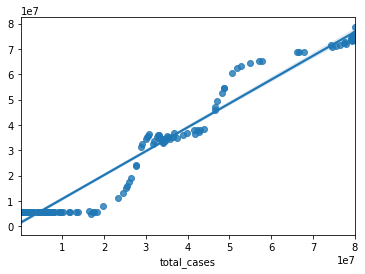

In [103]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
import seaborn as sns
#predictions  = regression_model.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [104]:
# For y_new_cases

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_new_cases,test_size=0.2)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
predictions=regression_model.predict(X_test)
regression_model.score(X_test,y_test)
#y_predicted = regression_model.predict(X_test)
#regression_model.score(X_test,y_test)

0.17571895134289872

R^2 score: 0.18
MAE score: 72352.34
EVS score: 0.18


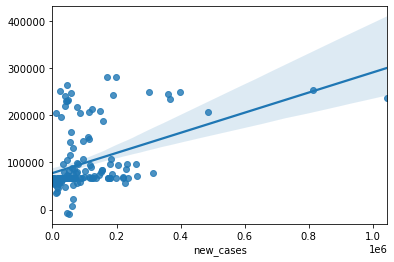

In [110]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
import seaborn as sns
#predictions  = regression_model.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [111]:
# For y_total_deaths

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_total_deaths,test_size=0.2)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
predictions=regression_model.predict(X_test)
regression_model.score(X_test,y_test)
#y_predicted = regression_model.predict(X_test)
#regression_model.score(X_test,y_test)

0.9330959611874593

R^2 score: 0.93
MAE score: 58591.66
EVS score: 0.93


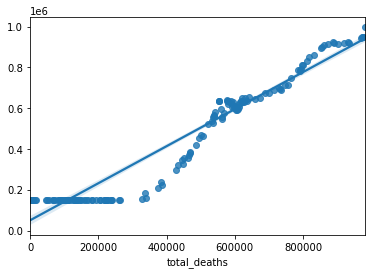

In [113]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
import seaborn as sns
#predictions  = regression_model.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [114]:
# For y_new_deaths

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_new_deaths,test_size=0.2)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
predictions=regression_model.predict(X_test)
regression_model.score(X_test,y_test)
#y_predicted = regression_model.predict(X_test)
#regression_model.score(X_test,y_test)

0.015522229571901414

R^2 score: 0.02
MAE score: 815.68
EVS score: 0.03


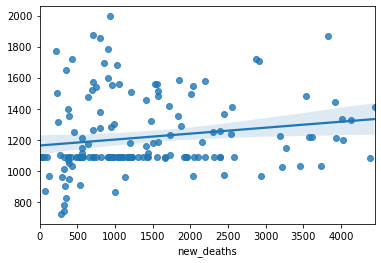

In [116]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
import seaborn as sns
#predictions  = regression_model.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [119]:
# LogisticRegression Model

In [120]:
from sklearn.linear_model import LogisticRegression

In [124]:
# For y_total_cases

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y_total_cases,test_size=0.2)

#model = LogisticRegression()
#model.fit(X_train, y_train)
#model.predict(X_test)
#model.score(X_test,y_test)

In [130]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


In [131]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X_train, y_train)

AttributeError: 'str' object has no attribute 'decode'

In [127]:
model = LogisticRegression()

In [128]:
model.fit(X_train, y_train)

AttributeError: 'str' object has no attribute 'decode'